## Given generalised harmonic game find strategically equivalent weighted zero sum game

In [1]:
from sympy import *
import itertools as it
import numpy as np
from gamelab import finitegames as nfg

### Harmonic payoff and measure

In [6]:
skeleton = [2, 2, 2]

h_flat = [11, -6, -4, -4, -1, 1, 0, -3, -4, -2, -3, 2, 1, 2, -4, 2, -10, 1, 2, -1, 3, -4, -3, -4]
h_packed = nfg.Utils.u_flat_to_packed(h_flat, skeleton)
h_packed

[[11, -6, -4, -4, -1, 1, 0, -3],
 [-4, -2, -3, 2, 1, 2, -4, 2],
 [-10, 1, 2, -1, 3, -4, -3, -4]]

In [7]:
# Harmonic measure
# controls position of equilibrium; for default (center) set all = 1
# else can choose any strictly positive number for each entry

mu_values = [  [1, 1], [1, 1], [1,1] ]

# Size is determined by skeleton
assert len(mu_values) == len(skeleton)
for i, Ai in enumerate(skeleton):
    assert len(mu_values[i]) == Ai

mu_values

[[1, 1], [1, 1], [1, 1]]

## Can run

----

In [10]:
# Harmonic mass
mass = [sum(mu) for mu in mu_values]
mass

[2, 2, 2]

In [11]:
# Make symbols: methods to dynamically create as many as needed strings and Sympy symbols
# Shift is starting index; default 0

def make_strings(N,s, shift = 0):
	my_strings = []
	for i in range(shift, N + shift):
	    tmp_st = f'{s}{i}'
	    my_strings.append(tmp_st)
	return my_strings

def make_symbols(N,s, shift = 0):
	my_symbols = []
	for i in range(shift, N + shift):
	    tmp_st = f'{s}{i}'
	    globals()[tmp_st] = Symbol(tmp_st)
	    my_symbols.append(globals()[tmp_st])
	return my_symbols

---

In [12]:
# N
numPlayers = len(skeleton)
players = range(numPlayers)

# -------------------------
# Number of action profiles
# -------------------------

# A
numPures = prod(skeleton)

# List of A_{-i} = for each player, number of action profiles of other players
numPuresMinus = [  int(numPures / skeleton[i]) for i in players ]

# -------------------------
# Number of payoff degrees of freedom
# -------------------------

# AN; number of payoff degrees of freedom
#numPays = numPlayers * numPures

# sum_i A_i; number of harmonic measure dofs
#numMeas = sum(skeleton)

In [13]:
# Pure actions: list of N lists, each with Ai elements; pure actions of each player

pures_play = [ make_strings(skeleton[i], f'a{i}', shift = 1) for i in players ]
pures_play

[['a01', 'a02'], ['a11', 'a12'], ['a21', 'a22']]

In [14]:
# Pure profiles; cartesian product of pure actions of each player
# Returns one list with A = numPures elements; each element is a tuple of strings

pures = list(it.product(*pures_play))
pures

[('a01', 'a11', 'a21'),
 ('a01', 'a11', 'a22'),
 ('a01', 'a12', 'a21'),
 ('a01', 'a12', 'a22'),
 ('a02', 'a11', 'a21'),
 ('a02', 'a11', 'a22'),
 ('a02', 'a12', 'a21'),
 ('a02', 'a12', 'a22')]

In [15]:
assert len(pures) == numPures

In [16]:
# Pack mu in list of dicts

mu = [   dict(zip( pures_play[i], mu_values[i] )) for i in players    ]
mu

[{'a01': 1, 'a02': 1}, {'a11': 1, 'a12': 1}, {'a21': 1, 'a22': 1}]

In [17]:
def print_payoff(payoff_dict, payoff_symbol):
    for i in players:
        for a in pures:
            print( f'{payoff_symbol}_{i}{a} = {payoff_dict[i][a]}' )
        print()

# Profiles of other players

In [18]:
# Pure profiles of other players
# Make list of N lists; the list pure_minus[i] contains the pure action profiles of players other than i
# Build taking the cartesian product of pure actions of all players other than i
# The size of the list pure_minus[i] is A_{-i} = \prod_{j \neq i} A_j

pures_minus = [ list( it.product( *( pures_play[:i] + pures_play[i+1:] ) ) ) for i in players ]

In [19]:
for i in players:
    assert len(pures_minus[i]) == numPuresMinus[i]

In [20]:
pures_minus

[[('a11', 'a21'), ('a11', 'a22'), ('a12', 'a21'), ('a12', 'a22')],
 [('a01', 'a21'), ('a01', 'a22'), ('a02', 'a21'), ('a02', 'a22')],
 [('a01', 'a11'), ('a01', 'a12'), ('a02', 'a11'), ('a02', 'a12')]]

# Make a

In [21]:
# Util to make (a_i, a_{-i}) given a_i and a_{-i} as tuple of strings (to be used as key for payoff dictionaries)
def make_pure(ai, a_minus_i, i):
    l = list(a_minus_i)
    return tuple(l[:i] + [ai] + l[i:])

In [22]:
def split_pure(a, i):
    
    ai = a[i]

    l = list(a)
    a_minus_i = tuple( l[:i] + l[i+1:] )
    return ai, a_minus_i

In [23]:
# check consistency
for i in players:
    for a in pures:
        ai, a_minus_i = split_pure(a, i)
        assert a == make_pure( ai, a_minus_i, i )

# Harmonic payoff as dictionary

In [24]:
h = [  dict(zip(pures , h_packed[i] ))  for i in players]

In [25]:
pures_play

[['a01', 'a02'], ['a11', 'a12'], ['a21', 'a22']]

In [26]:
mu

[{'a01': 1, 'a02': 1}, {'a11': 1, 'a12': 1}, {'a21': 1, 'a22': 1}]

In [27]:
mass

[2, 2, 2]

## Key: non-strategic
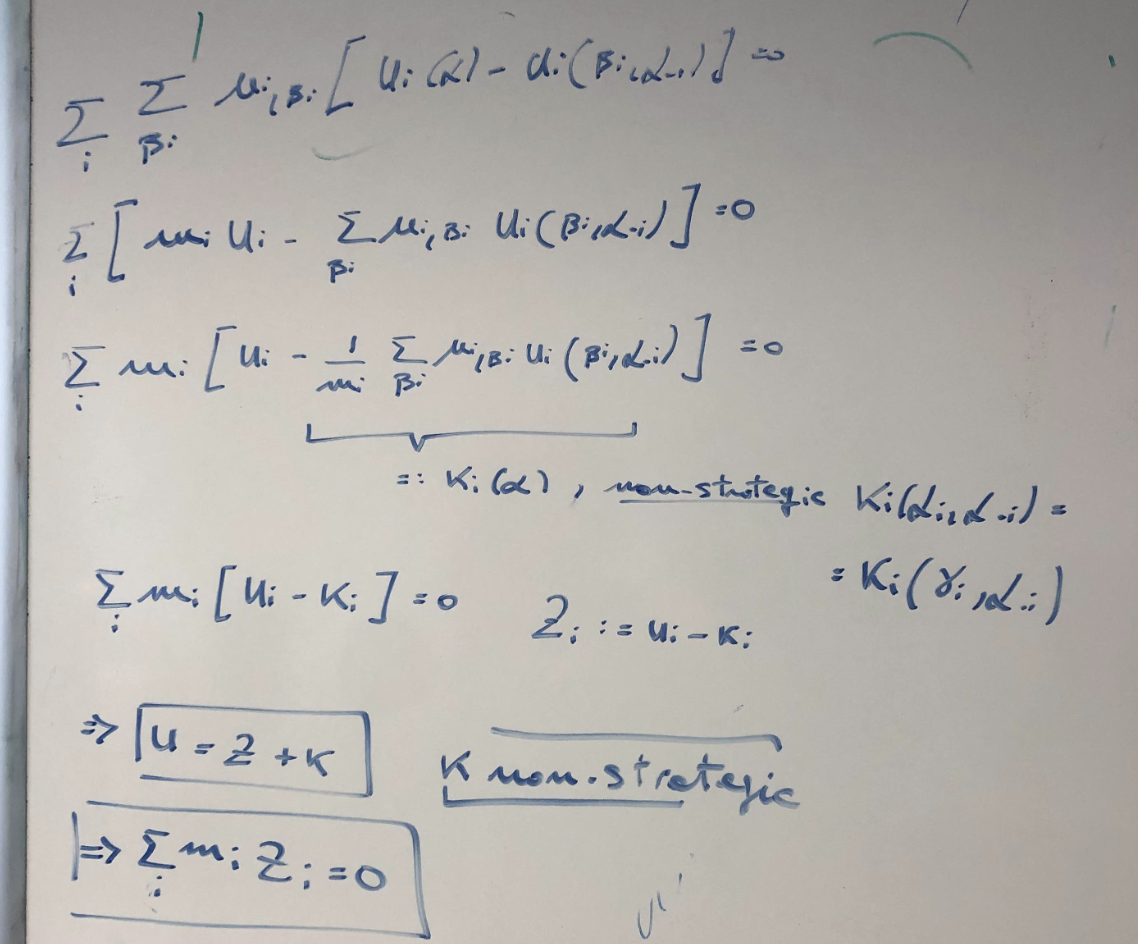

In [28]:
# non-strategic
k_packed = [  [  1 / mass[i] * sum([mu[i][bi] *  h[i][ make_pure( bi, split_pure(a,i)[-1] ,  i ) ]   for bi in pures_play[i] ])  for a in pures ]  for i in players]
k_packed

[[5.0, -2.5, -2.0, -3.5, 5.0, -2.5, -2.0, -3.5],
 [-3.5, 0.0, -3.5, 0.0, -1.5, 2.0, -1.5, 2.0],
 [-4.5, -4.5, 0.5, 0.5, -0.5, -0.5, -3.5, -3.5]]

In [29]:
k = [  dict(zip(pures , k_packed[i] ))  for i in players]
k

[{('a01', 'a11', 'a21'): 5.0,
  ('a01', 'a11', 'a22'): -2.5,
  ('a01', 'a12', 'a21'): -2.0,
  ('a01', 'a12', 'a22'): -3.5,
  ('a02', 'a11', 'a21'): 5.0,
  ('a02', 'a11', 'a22'): -2.5,
  ('a02', 'a12', 'a21'): -2.0,
  ('a02', 'a12', 'a22'): -3.5},
 {('a01', 'a11', 'a21'): -3.5,
  ('a01', 'a11', 'a22'): 0.0,
  ('a01', 'a12', 'a21'): -3.5,
  ('a01', 'a12', 'a22'): 0.0,
  ('a02', 'a11', 'a21'): -1.5,
  ('a02', 'a11', 'a22'): 2.0,
  ('a02', 'a12', 'a21'): -1.5,
  ('a02', 'a12', 'a22'): 2.0},
 {('a01', 'a11', 'a21'): -4.5,
  ('a01', 'a11', 'a22'): -4.5,
  ('a01', 'a12', 'a21'): 0.5,
  ('a01', 'a12', 'a22'): 0.5,
  ('a02', 'a11', 'a21'): -0.5,
  ('a02', 'a11', 'a22'): -0.5,
  ('a02', 'a12', 'a21'): -3.5,
  ('a02', 'a12', 'a22'): -3.5}]

## Weighted zero-sum

In [30]:
# zero-sum
z_packed = [  np.array( h_packed[i] ) - np.array( k_packed[i] )    for i in players   ]
z_packed

[array([ 6. , -3.5, -2. , -0.5, -6. ,  3.5,  2. ,  0.5]),
 array([-0.5, -2. ,  0.5,  2. ,  2.5,  0. , -2.5,  0. ]),
 array([-5.5,  5.5,  1.5, -1.5,  3.5, -3.5,  0.5, -0.5])]

In [31]:
mass

[2, 2, 2]

### Weighted-zero sum! ok

In [33]:
sum([  mass[i] * z_packed[i] for i in players  ])

array([0., 0., 0., 0., 0., 0., 0., 0.])

# z is sought-after weighted zero-sum game equivalent to given harmonic game

In [35]:
z = [  dict(zip(pures , z_packed[i] ))  for i in players]
z

[{('a01', 'a11', 'a21'): 6.0,
  ('a01', 'a11', 'a22'): -3.5,
  ('a01', 'a12', 'a21'): -2.0,
  ('a01', 'a12', 'a22'): -0.5,
  ('a02', 'a11', 'a21'): -6.0,
  ('a02', 'a11', 'a22'): 3.5,
  ('a02', 'a12', 'a21'): 2.0,
  ('a02', 'a12', 'a22'): 0.5},
 {('a01', 'a11', 'a21'): -0.5,
  ('a01', 'a11', 'a22'): -2.0,
  ('a01', 'a12', 'a21'): 0.5,
  ('a01', 'a12', 'a22'): 2.0,
  ('a02', 'a11', 'a21'): 2.5,
  ('a02', 'a11', 'a22'): 0.0,
  ('a02', 'a12', 'a21'): -2.5,
  ('a02', 'a12', 'a22'): 0.0},
 {('a01', 'a11', 'a21'): -5.5,
  ('a01', 'a11', 'a22'): 5.5,
  ('a01', 'a12', 'a21'): 1.5,
  ('a01', 'a12', 'a22'): -1.5,
  ('a02', 'a11', 'a21'): 3.5,
  ('a02', 'a11', 'a22'): -3.5,
  ('a02', 'a12', 'a21'): 0.5,
  ('a02', 'a12', 'a22'): -0.5}]

In [38]:
print(nfg.Utils.flatten(z_packed))

[6.0, -3.5, -2.0, -0.5, -6.0, 3.5, 2.0, 0.5, -0.5, -2.0, 0.5, 2.0, 2.5, 0.0, -2.5, 0.0, -5.5, 5.5, 1.5, -1.5, 3.5, -3.5, 0.5, -0.5]


# End